<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="380" alt="Skills Network Logo">
    </a>
</p>


# **Data Visualization Lab**


Estimated time needed: **45 to 60** minutes


In this assignment you will be focusing on the visualization of data.

The data set will be presented to you in the form of a RDBMS.

You will have to use SQL queries to extract the data.


## Objectives


In this lab you will perform the following:


-   Visualize the distribution of data.

-   Visualize the relationship between two features.

-   Visualize composition of data.

-   Visualize comparison of data.


<hr>


## Demo: How to work with database


Download database file.


In [1]:
!wget https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/LargeData/m4_survey_data.sqlite

--2024-09-04 09:02:30--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/LargeData/m4_survey_data.sqlite
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 169.63.118.104, 169.63.118.104
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|169.63.118.104|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 36679680 (35M) [application/octet-stream]
Saving to: ‘m4_survey_data.sqlite’

m4_survey_data.sqli 100%[===================>]  34.98M  48.2MB/s    in 0.7s    

2024-09-04 09:02:32 (48.2 MB/s) - ‘m4_survey_data.sqlite’ saved [36679680/36679680]



Connect to the database.


In [24]:
import sqlite3
conn = sqlite3.connect("m4_survey_data.sqlite") # open a database connection

Import pandas module.


In [25]:
import pandas as pd

## Demo: How to run an sql query


In [26]:
# print how many rows are there in the table named 'master'
QUERY = """
SELECT COUNT(*)
FROM master
"""

# the read_sql_query runs the sql query and returns the data as a dataframe
df = pd.read_sql_query(QUERY,conn)
df.head()

,COUNT(*)
0,11398


## Demo: How to list all tables


In [27]:
# print all the tables names in the database
QUERY = """
SELECT name as Table_Name FROM
sqlite_master WHERE
type = 'table'
"""
# the read_sql_query runs the sql query and returns the data as a dataframe
pd.read_sql_query(QUERY,conn)


,Table_Name
0,EduOther
1,DevType
2,LastInt
3,JobFactors
4,WorkPlan
5,WorkChallenge
6,LanguageWorkedWith
7,LanguageDesireNextYear
8,DatabaseWorkedWith
9,DatabaseDesireNextYear


## Demo: How to run a group by query


In [28]:
QUERY = """
SELECT Age,COUNT(*) as count
FROM master
group by age
order by age
"""
pd.read_sql_query(QUERY,conn)

,Age,count
0,NaN,287
1,16.0,3
2,17.0,6
3,18.0,29
4,19.0,78
5,20.0,109
6,21.0,203
7,22.0,406
8,23.0,581
9,24.0,679


## Demo: How to describe a table


In [32]:
QUERY = """
SELECT LanguageDesireNextYear, COUNT(*) as Count
FROM LanguageDesireNextYear
GROUP BY LanguageDesireNextYear
ORDER BY Count DESC
""".format(table_name)
df = pd.read_sql_query(QUERY,conn)
print(df.iat[0,0])

JavaScript


In [33]:
QUERY = """
SELECT COUNT(*)
FROM LanguageWorkedWith
WHERE LanguageWorkedWith = 'SQL';
""".format(table_name)
df = pd.read_sql_query(QUERY,conn)
print(df.iat[0,0])

7106


In [34]:
QUERY = """
SELECT COUNT(*) 
FROM (
    SELECT Respondent, COUNT(DISTINCT DatabaseWorkedWith) as num_dbs
    FROM DatabaseWorkedWith
    WHERE DatabaseWorkedWith = 'MySQL'
    GROUP BY Respondent
) AS MySQL_Only
WHERE num_dbs = 1;
""".format(table_name)
df = pd.read_sql_query(QUERY,conn)
print(df.iat[0,0])

5469


In [7]:
table_name = 'master'  # the table you wish to describe

QUERY = """
SELECT sql FROM sqlite_master
WHERE name= '{}'
""".format(table_name)

df = pd.read_sql_query(QUERY,conn)
print(df.iat[0,0])

CREATE TABLE "master" (
"index" INTEGER,
  "Respondent" INTEGER,
  "MainBranch" TEXT,
  "Hobbyist" TEXT,
  "OpenSourcer" TEXT,
  "OpenSource" TEXT,
  "Employment" TEXT,
  "Country" TEXT,
  "Student" TEXT,
  "EdLevel" TEXT,
  "UndergradMajor" TEXT,
  "OrgSize" TEXT,
  "YearsCode" TEXT,
  "Age1stCode" TEXT,
  "YearsCodePro" TEXT,
  "CareerSat" TEXT,
  "JobSat" TEXT,
  "MgrIdiot" TEXT,
  "MgrMoney" TEXT,
  "MgrWant" TEXT,
  "JobSeek" TEXT,
  "LastHireDate" TEXT,
  "FizzBuzz" TEXT,
  "ResumeUpdate" TEXT,
  "CurrencySymbol" TEXT,
  "CurrencyDesc" TEXT,
  "CompTotal" REAL,
  "CompFreq" TEXT,
  "ConvertedComp" REAL,
  "WorkWeekHrs" REAL,
  "WorkRemote" TEXT,
  "WorkLoc" TEXT,
  "ImpSyn" TEXT,
  "CodeRev" TEXT,
  "CodeRevHrs" REAL,
  "UnitTests" TEXT,
  "PurchaseHow" TEXT,
  "PurchaseWhat" TEXT,
  "OpSys" TEXT,
  "BlockchainOrg" TEXT,
  "BlockchainIs" TEXT,
  "BetterLife" TEXT,
  "ITperson" TEXT,
  "OffOn" TEXT,
  "SocialMedia" TEXT,
  "Extraversion" TEXT,
  "ScreenName" TEXT,
  "SOVisit1st" T

# Hands-on Lab


## Visualizing distribution of data


### Histograms


Plot a histogram of `ConvertedComp.`


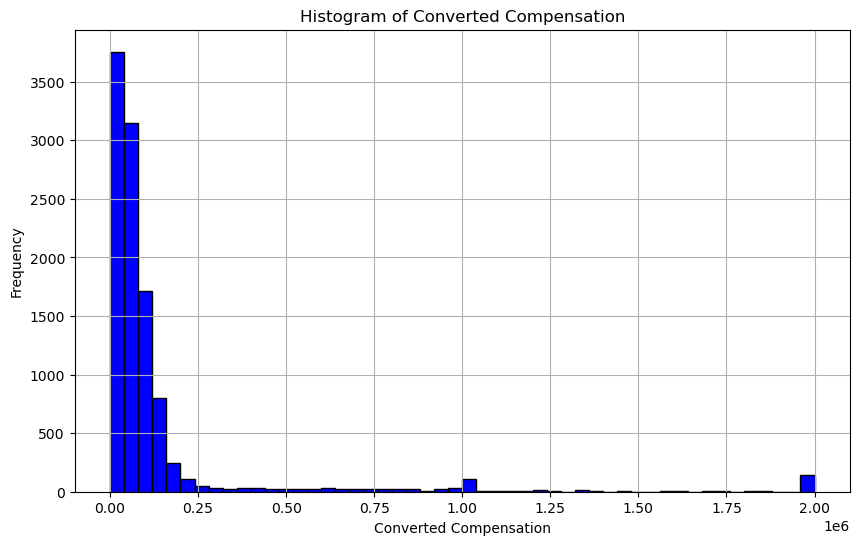

In [8]:
import matplotlib.pyplot as plt

# Query to retrieve ConvertedComp data
QUERY = """
SELECT ConvertedComp
FROM master
"""
df = pd.read_sql_query(QUERY, conn)

# Plot histogram
plt.figure(figsize=(10,6))
plt.hist(df['ConvertedComp'].dropna(), bins=50, color='blue', edgecolor='black')
plt.title('Histogram of Converted Compensation')
plt.xlabel('Converted Compensation')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

### Box Plots


Plot a box plot of `Age.`


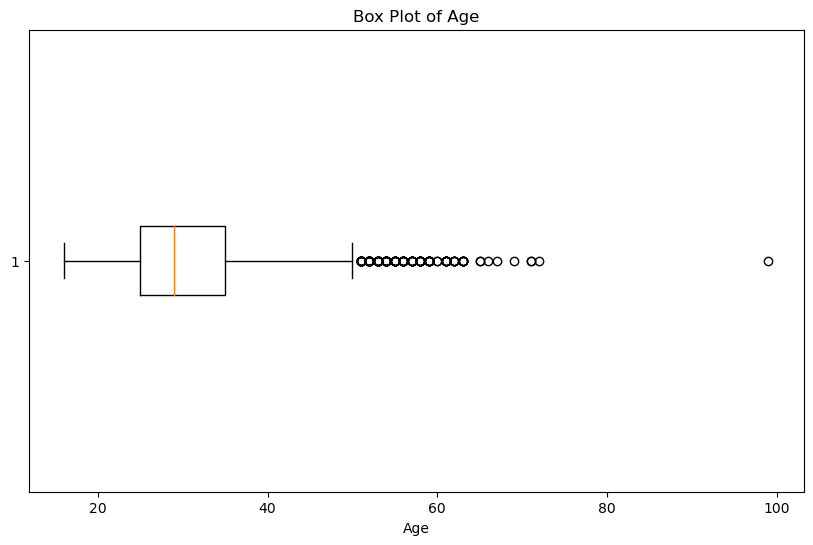

In [9]:
# Query to retrieve Age data
QUERY = """
SELECT Age
FROM master
"""
df = pd.read_sql_query(QUERY, conn)

# Plot box plot
plt.figure(figsize=(10,6))
plt.boxplot(df['Age'].dropna(), vert=False)
plt.title('Box Plot of Age')
plt.xlabel('Age')
plt.show()

## Visualizing relationships in data


### Scatter Plots


Create a scatter plot of `Age` and `WorkWeekHrs.`


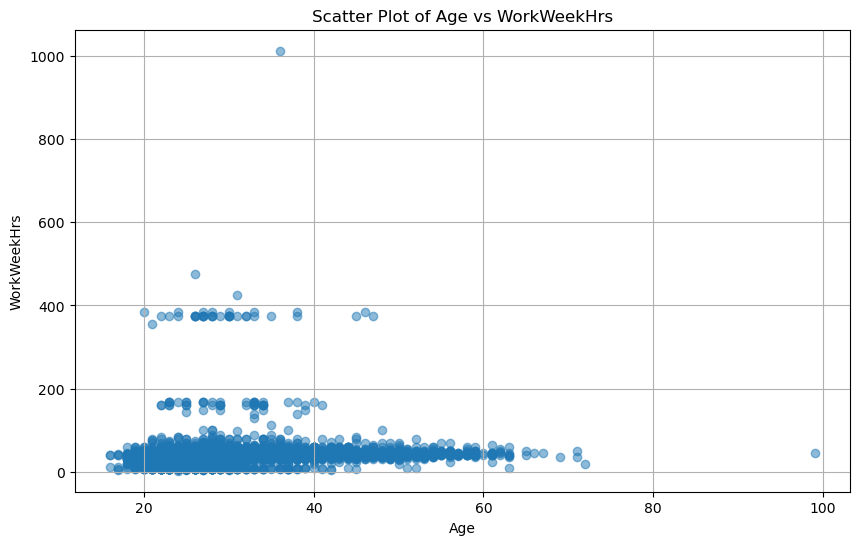

In [11]:
# Query to retrieve Age and WorkWeekHrs data
QUERY = """
SELECT Age, WorkWeekHrs
FROM master
"""
df = pd.read_sql_query(QUERY, conn)

# Drop rows with NaN values in either Age or WorkWeekHrs columns
df_clean = df.dropna(subset=['Age', 'WorkWeekHrs'])

# Plot scatter plot
plt.figure(figsize=(10,6))
plt.scatter(df_clean['Age'], df_clean['WorkWeekHrs'], alpha=0.5)
plt.title('Scatter Plot of Age vs WorkWeekHrs')
plt.xlabel('Age')
plt.ylabel('WorkWeekHrs')
plt.grid(True)
plt.show()

### Bubble Plots


Create a bubble plot of `WorkWeekHrs` and `CodeRevHrs`, use `Age` column as bubble size.


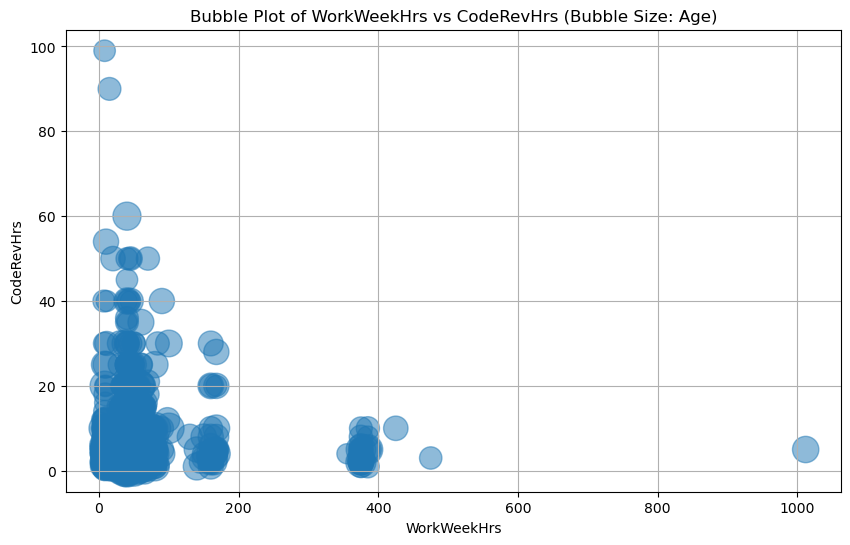

In [15]:
# Query to retrieve WorkWeekHrs, CodeRevHrs, and Age data
QUERY = """
SELECT WorkWeekHrs, CodeRevHrs, Age
FROM master
"""
df = pd.read_sql_query(QUERY, conn)

# Drop rows with NaN values in either WorkWeekHrs, CodeRevHrs, or Age columns
df_clean = df.dropna(subset=['WorkWeekHrs', 'CodeRevHrs', 'Age'])

# Scale the bubble sizes (you may need to adjust the scaling factor)
bubble_size = df_clean['Age'] * 10  # Adjust the scaling factor as needed

# Plot bubble plot
plt.figure(figsize=(10,6))
plt.scatter(df_clean['WorkWeekHrs'], df_clean['CodeRevHrs'],
            s=bubble_size, alpha=0.5)
plt.title('Bubble Plot of WorkWeekHrs vs CodeRevHrs (Bubble Size: Age)')
plt.xlabel('WorkWeekHrs')
plt.ylabel('CodeRevHrs')
plt.grid(True)
plt.show()


## Visualizing composition of data


### Pie Charts


Create a pie chart of the top 5 databases that respondents wish to learn next year. Label the pie chart with database names. Display percentages of each database on the pie chart.


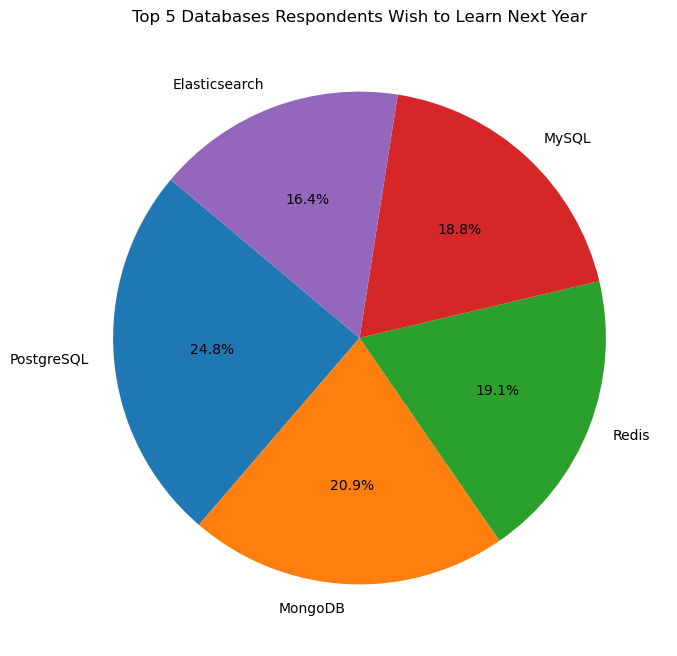

In [16]:
# Query to retrieve the top 5 databases respondents wish to learn next year
QUERY = """
SELECT DatabaseDesireNextYear, COUNT(*) as Count
FROM DatabaseDesireNextYear
GROUP BY DatabaseDesireNextYear
ORDER BY Count DESC
LIMIT 5
"""
df = pd.read_sql_query(QUERY, conn)

# Plot pie chart
plt.figure(figsize=(8,8))
plt.pie(df['Count'], labels=df['DatabaseDesireNextYear'], autopct='%1.1f%%', startangle=140)
plt.title('Top 5 Databases Respondents Wish to Learn Next Year')
plt.show()

### Stacked Charts


Create a stacked chart of median `WorkWeekHrs` and `CodeRevHrs` for the age group 30 to 35.


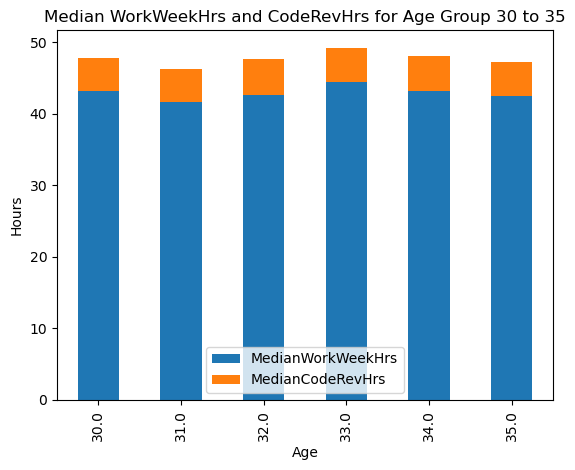

In [17]:
# Query to retrieve median WorkWeekHrs and CodeRevHrs for age group 30-35
QUERY = """
SELECT
    Age,
    AVG(WorkWeekHrs) as MedianWorkWeekHrs,
    AVG(CodeRevHrs) as MedianCodeRevHrs
FROM master
WHERE Age >= 30 AND Age <= 35
GROUP BY Age
"""
df = pd.read_sql_query(QUERY, conn)

# Plot stacked chart
df.set_index('Age').plot(kind='bar', stacked=True)
plt.title('Median WorkWeekHrs and CodeRevHrs for Age Group 30 to 35')
plt.xlabel('Age')
plt.ylabel('Hours')
plt.show()

## Visualizing comparison of data


### Line Chart


Plot the median `ConvertedComp` for all ages from 45 to 60.


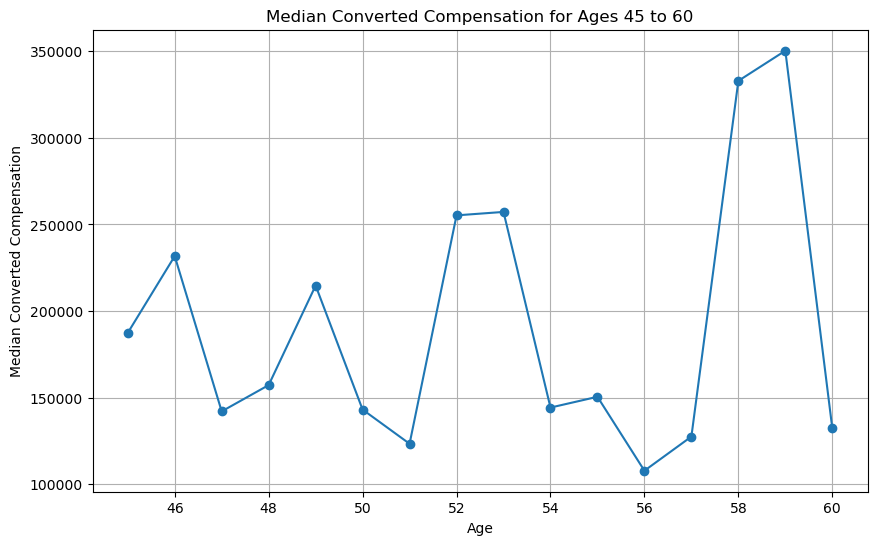

In [18]:
# Query to retrieve median ConvertedComp for ages 45 to 60
QUERY = """
SELECT Age, AVG(ConvertedComp) as MedianConvertedComp
FROM master
WHERE Age >= 45 AND Age <= 60
GROUP BY Age
"""
df = pd.read_sql_query(QUERY, conn)

# Plot line chart
plt.figure(figsize=(10,6))
plt.plot(df['Age'], df['MedianConvertedComp'], marker='o')
plt.title('Median Converted Compensation for Ages 45 to 60')
plt.xlabel('Age')
plt.ylabel('Median Converted Compensation')
plt.grid(True)
plt.show()


### Bar Chart


Create a horizontal bar chart using column `MainBranch.`


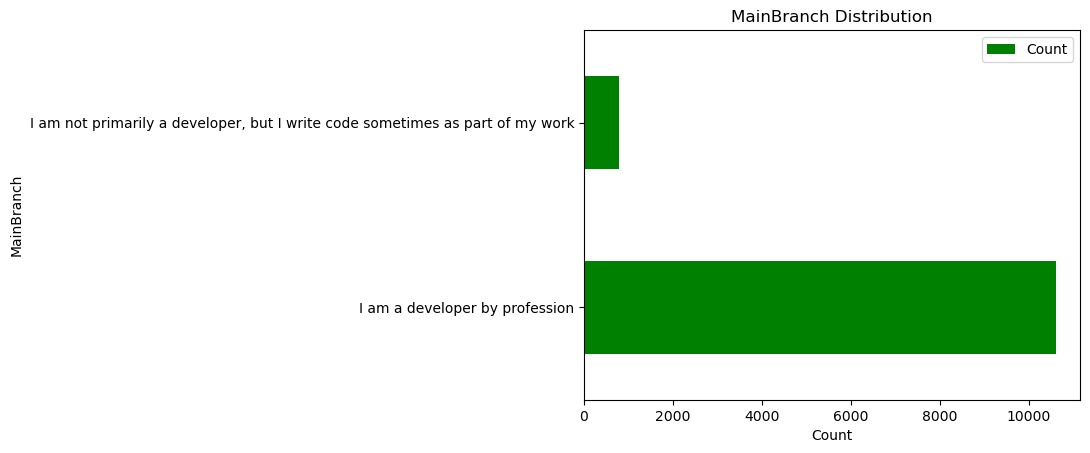

In [19]:
# Query to retrieve MainBranch data
QUERY = """
SELECT MainBranch, COUNT(*) as Count
FROM master
GROUP BY MainBranch
ORDER BY Count DESC
"""
df = pd.read_sql_query(QUERY, conn)

# Plot horizontal bar chart
df.plot(kind='barh', x='MainBranch', y='Count', color='green')
plt.title('MainBranch Distribution')
plt.xlabel('Count')
plt.ylabel('MainBranch')
plt.show() 


Close the database connection.


In [20]:
conn.close()

## Authors


Ramesh Sannareddy


### Other Contributors


Rav Ahuja


 Copyright © 2020 IBM Corporation. This notebook and its source code are released under the terms of the [MIT License](https://cognitiveclass.ai/mit-license?cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ&cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ&cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ&cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ).


<!--## Change Log


<!--| Date (YYYY-MM-DD) | Version | Changed By        | Change Description                 |
| ----------------- | ------- | ----------------- | ---------------------------------- |
| 2020-10-17        | 0.1     | Ramesh Sannareddy | Created initial version of the lab |--!>
